## Part 1-1: Double exposure

### Step 1: loading original image

(4032, 2268, 3)

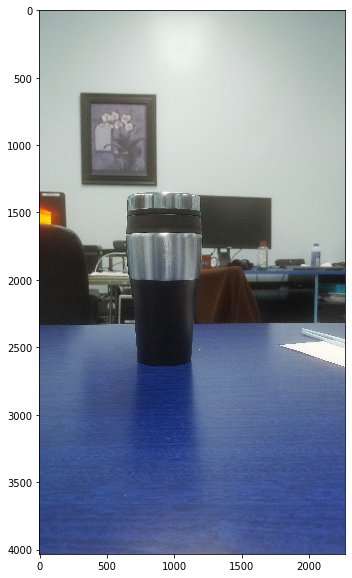

In [421]:
import os
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
img_dir= r"C:\Users\fhvgmana\Documents\Memphis 2020\Image processing\programming\image_new"
img_path = os.path.join(img_dir,'*g')
files = glob.glob(img_path)
images=[]
for im in files:
    image=cv2.imread(im)
    image.astype(dtype=np.int)
#     image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    images.append(image)
def snr_cal(im):
    mean= np.mean(image)
    std=np.std(image)
    snr=mean/std
    return snr
f = plt.figure(figsize=(20,10))
plt.imshow(images[1])
images[1].shape

### Step2: Adding 12 images and computing Peak SNR after adding each images
   #### - Images dimensions were checked                                                                                                                                                                         - Peak SNR (PSNR was computed)

<Figure size 432x288 with 0 Axes>

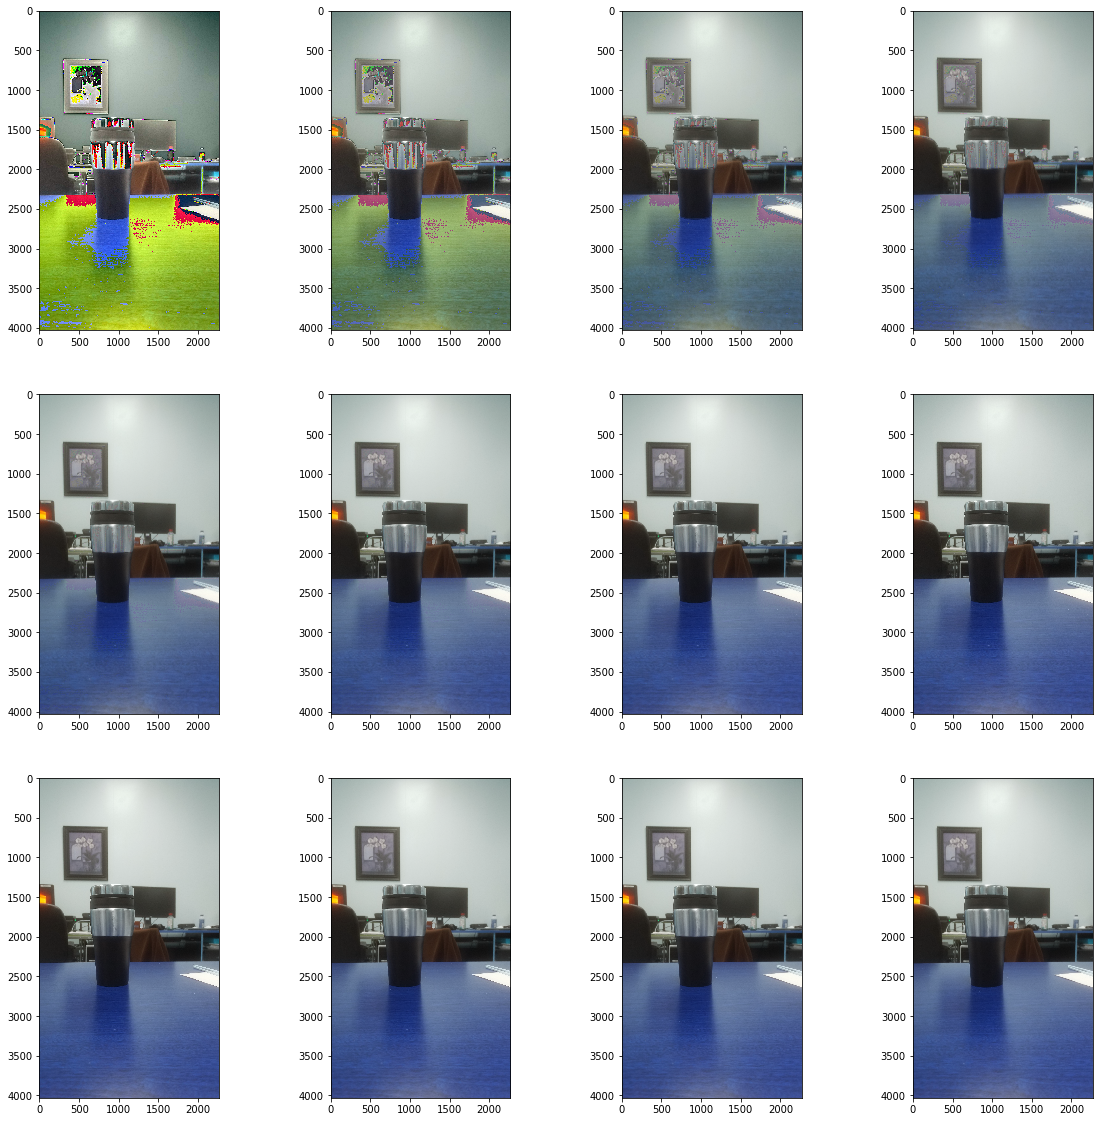

In [422]:

im_add=[images[0]]
im_add[-1]
psnr=[]
noise_var=[]
for i in range(len(images)):
    img= im_add[-1]+images[i]
    img=img.astype(dtype=np.int)
    img= ((img-img.min())/(img.max()-img.min()))*255
    img=img.astype(dtype=np.int)
    im_noise =images[0]-img
    im_add.append(img)
    noise_var.append(np.var(im_noise))
#     psnr.append(cv2.PSNR(images[0],img))
fig=plt.figure()
f = plt.figure(figsize=(20,20))
for i in range(1,len(im_add)):
    f.add_subplot(3,4,i)
    
    plt.imshow(im_add[i]) 
plt.show()



#### SNR and Noise Variance

Text(0, 0.5, 'Noise Variance')

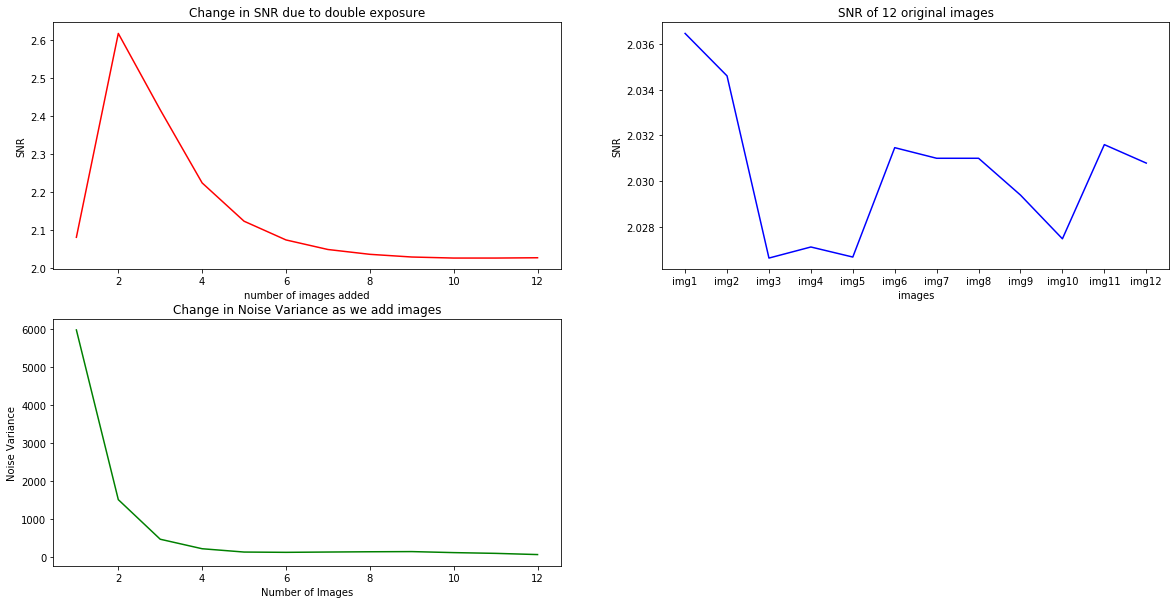

In [423]:
def snr_cal(image):
    mean=np.mean(image)
    std=np.std(image)
    snr=mean/std
    return snr 
snr_add=[]
snr_orig=[]
## Snr calculation from double exposure
for i in im_add:
    img_snr= snr_cal(i)
    snr_add.append(img_snr)
    
## Snr calculation of original images
for  k in images:
    img_snr_or=snr_cal(k)
    snr_orig.append(img_snr_or)
## renove SNR of original image
del snr_add[0]
x=["img1","img2","img3","img4","img5","img6","img7","img8","img9","img10","img11","img12"]
x1=[1,2,3,4,5,6,7,8,9,10,11,12]
# plt.plot(x,snr_orig,label="Peak Signal to Noise Ratio")
f = plt.figure(figsize=(20,10))
f.add_subplot(221)
plt.plot(x1, snr_add,'r')
plt.title('Change in SNR due to double exposure')
plt.xlabel('number of images added')
plt.ylabel('SNR')
f.add_subplot(222)
plt.plot(x, snr_orig,'b') 
plt.title('SNR of 12 original images')
plt.xlabel('images')
plt.ylabel('SNR')
f.add_subplot(223)
plt.plot(x1, noise_var,"g") # plotting t, a separately 
plt.title('Change in Noise Variance as we add images')
plt.xlabel('Number of Images')
plt.ylabel('Noise Variance')


### Part1-2: Change Detection

456.4956076706176


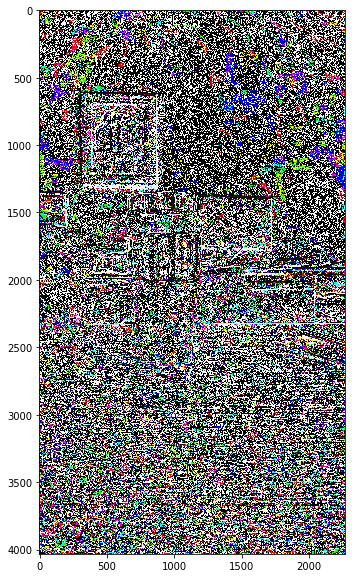

In [424]:
k=images[0]-im_add[3]
print(np.var(k))
# First I find image difference between two images taken under the same conditions
image1= images[0]
image2=images[1]
# im_diff1,im_diff2,im_diff3,im_diff4,im_diff5= images[0]-images[1],images[0]-images[2],images[0]-images[3],images[0]-images[4]
im_diff= image1-image2
plt.figure(figsize=(10,10))
plt.imshow(im_diff,cmap="gray")


#### Part1-3: Image Muliplication

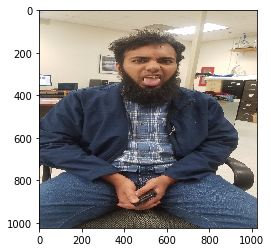

In [425]:
## We first load our image of interest
img_dir= r"C:\Users\fhvgmana\Documents\Memphis 2020\Image processing\programming\kizito"
img_path = os.path.join(img_dir,'*g')
files = glob.glob(img_path)
Ash_img=[]
for im in files:
    image=cv2.imread(im)
    image.astype(dtype=np.int)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(1024,1024))
    Ash_img.append(image)
im=cv2.imread(files[2])
kiz_img[1].shape
plt.imshow(Ash_img[6])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


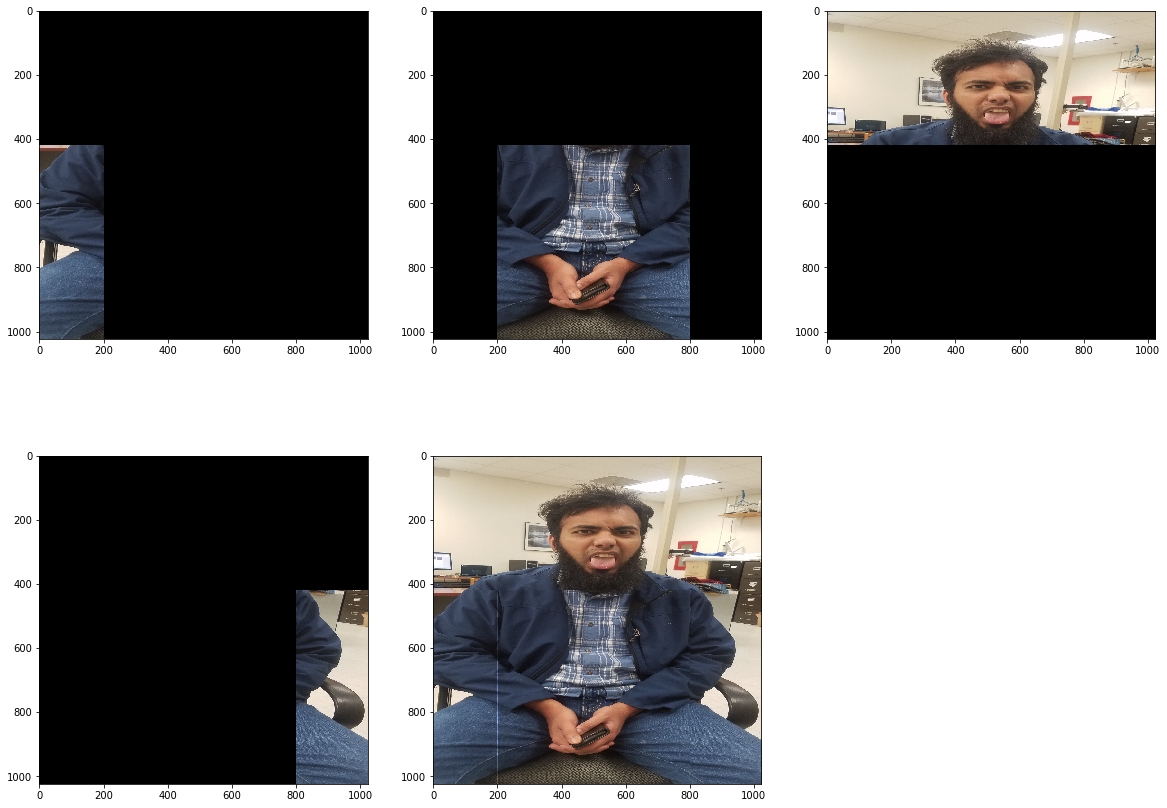

In [426]:
ash_face_mask= np.zeros_like(Ash_img[6])
cv2.rectangle(ash_face_mask, (0,0), (1024, 420),(255,255,255), thickness=-1)

# Creatng different masks
ash_left_mask=np.zeros_like(Ash_img[5])
cv2.rectangle(ash_left_mask, (0,420), (200,1024),(255,255,255), thickness=-1)
ash_right_mask=np.zeros_like(Ash_img[4])
cv2.rectangle(ash_right_mask,(800,420),(1024,1024),(255,255,255), thickness=-1)
middle_mask=np.zeros_like(Ash_img[3])
cv2.rectangle(middle_mask, (200,420), (800,1024),(255,255,255),thickness=-1)

# Multiplication of masks and different images
face=(Ash_img[6]/255)*(ash_face_mask/255)
right=(Ash_img[4]/255)*(ash_right_mask/255)
left=(ash_left_mask/255)*(Ash_img[2]/255)
tommy= (Ash_img[3]/255)*(middle_mask/255)

## Addition to get original image
Ashraf= face+right+left+tommy
masked=[left,tommy, face,right,Ashraf]
f = plt.figure(figsize=(20,15))
f.add_subplot(231)
plt.imshow(left)
f.add_subplot(232)
plt.imshow(tommy )        
f.add_subplot(233)
plt.imshow(face)        
f.add_subplot(234)
plt.imshow(right)
f.add_subplot(235)
plt.imshow(Ashraf)



### Part2-1: Image Resolution

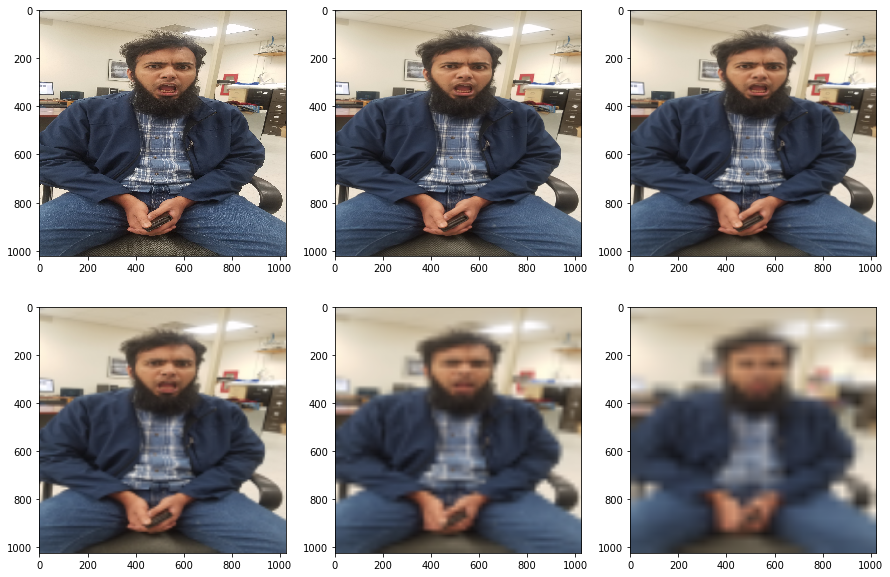

In [427]:
# Image to be used
img=Ash_img[5]
## Resizing operation 
dim=[(1024,1024),(512,512),(256,256),(128,128),(64,64),(32,32)]
im2=cv2.resize(img,dim[1])
im2=cv2.resize(im2,dim[0])
im3=cv2.resize(im2,dim[2])
im3=cv2.resize(im3,dim[0])
im4=cv2.resize(im3,dim[3])
im4=cv2.resize(im4,dim[0])
im5=cv2.resize(im4,dim[4])
im5=cv2.resize(im5,dim[0])
im6=cv2.resize(im5,dim[5])
im6=cv2.resize(im6,dim[0])

# Collection of our resolved images
# Plotting images with different resolution after resizing to 1024*1024
sampled=[img,im2,im3,im4,im5,im6]
for i in sampled:
     i=cv2.resize(i,dim[0])
f = plt.figure(figsize=(15,10))
for i in range(1,len(sampled)+1):
    f.add_subplot(2,3,i) 
    plt.imshow(sampled[i-1])
sampled[1].shape

plt.show()

### Part 2: Quantization

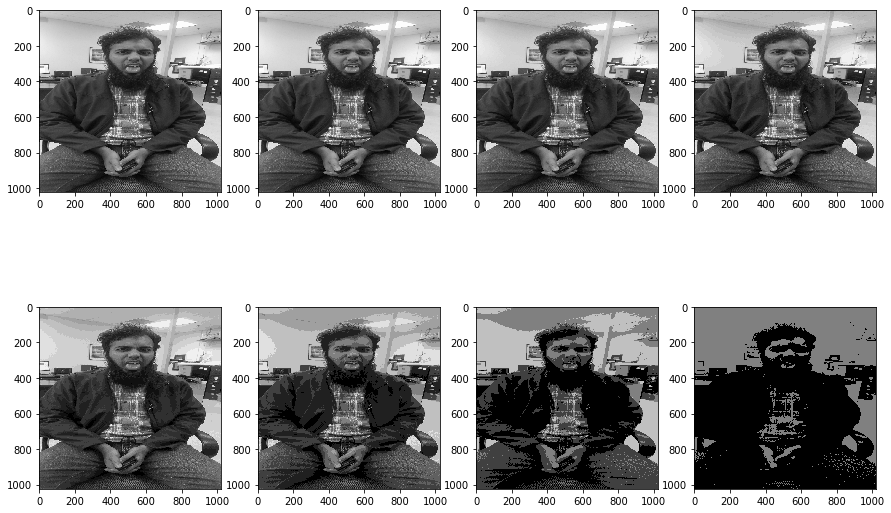

In [428]:
img=cv2.cvtColor(Ash_img[6], cv2.COLOR_BGR2GRAY)
## Quantization function takes original image required range of pixel values
# It returns a quantized image
def quantization( img, rmin,rmax):
    imgmax=img.max()
    imgmin=img.min()
    quantized=((img-imgmin)/(imgmax-imgmin))*(rmax-rmin)
    quantized = quantized.astype(np.uint8)
    return quantized
img_quantized=[quantization(img,0,255),quantization(img,0,127),quantization(img,0,64),quantization(img,0,32),quantization(img,0,16),quantization(img,0,8),quantization(img,0,4),quantization(img,0,2)]
snr=[]
f= plt.figure(figsize=(15,10))
for i in range(1,len(img_quantized)+1):
    f.add_subplot(2,4,i) 
    snr.append(snr_cal(img_quantized[i-1]))
    plt.imshow(img_quantized[i-1],cmap='gray')
plt.show()


### Part 2-3:  Quantization

8


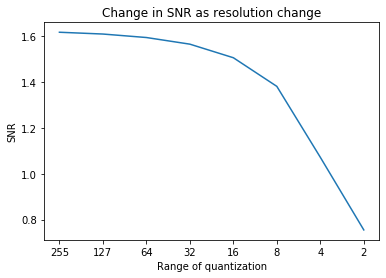

In [429]:
## SNR calculated above is plotted over the corresponding max range
x=["255","127","64","32","16","8","4","2"]
plt.plot(x,snr)
plt.ylabel("SNR")
plt.xlabel("Range of quantization")
plt.title("Change in SNR as resolution change")
print(len(snr))

### Part 2-3: Multi-resolution

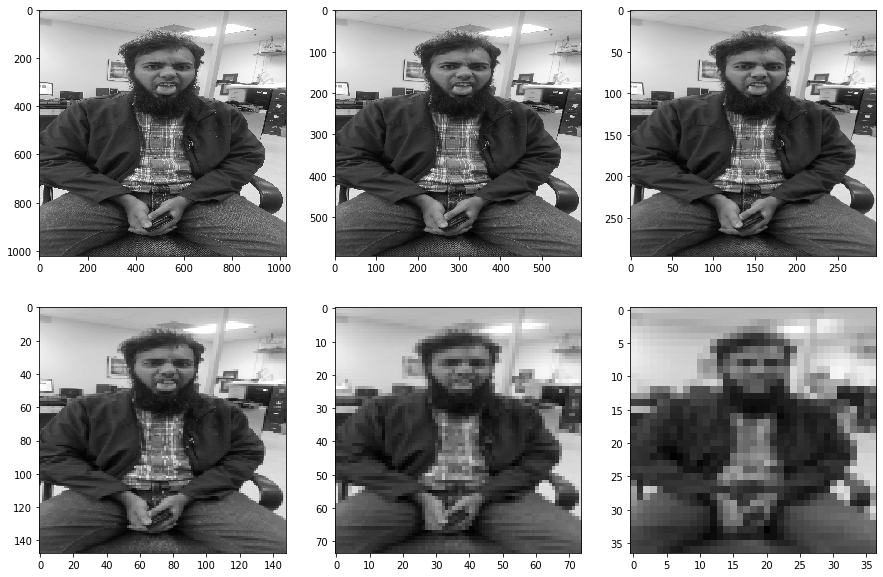

In [430]:
# Dimension is reduced by factor of 1.72
#  Dimension was converted to integer values since resize function only takes integers
dim1=1024
dim2=np.int(dim1/1.72)
dim3=np.int(dim1/3.44)
dim4=np.int(dim1/6.88)
dim5=np.int(dim1/13.76)
dim6=np.int(dim1/27.52)

im2=cv2.resize(img,(dim2,dim2))
im3=cv2.resize(im2,(dim3,dim3))

im4=cv2.resize(im3,(dim4,dim4))

im5=cv2.resize(im4,(dim5,dim5))

im6=cv2.resize(im5,(dim6,dim6))
sampled=[img,im2,im3,im4,im5,im6]
f = plt.figure(figsize=(15,10))

for i in range(1,len(sampled)+1):
    f.add_subplot(2,3,i) 
    plt.imshow(sampled[i-1],cmap="gray")
